Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Creating Datafrme

In [2]:
def get_processed_df(path: str) -> pd.DataFrame:
    """read csv file and create dataframe
    Args:
      path: path to dataset
    Returns:
      Dataframe without NaN values and with the addition of the Fahrenheit temperature column
    """
    df = pd.read_csv(path, header=None)
    df.columns = ["Date",
                  "Day celsius temperature", "Day press", "Day wind dirrection", "Day wind speed",
                  "Night celsius temperature", "Night press", "Night wind dirrection", "Night wind speed"]
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    if not ((df.isnull().sum()).eq(0).all()):
        df.dropna(inplace=True, ignore_index=True)
    df['Day fahrenheit temperature'] = 9/5 * df['Day celsius temperature'] + 32
    df['Night fahrenheit temperature'] = 9 / \
        5 * df['Night celsius temperature'] + 32
    return df

In [4]:
df = get_processed_df("dataset.csv")

In [17]:
print(df)

           Date  Day celsius temperature Day press Day wind dirrection  \
0    2008-01-10                      -20       765                   В   
1    2008-01-12                      -20       762                   З   
2    2008-01-13                       -9       756                  ЮЗ   
3    2008-01-14                       -6       751                  ЮЗ   
4    2008-01-15                       -1       753                   З   
...         ...                      ...       ...                 ...   
5630 2023-11-28                        1       746                  ЮЗ   
5631 2023-11-29                       -1       755                   З   
5632 2023-11-30                       -4       753                   В   
5633 2023-12-01                       -1       749                  ЮЗ   
5634 2023-12-02                       -1       738                   З   

      Day wind speed  Night celsius temperature  Night press  \
0                2.0                      -22.0

Statistical info

In [5]:
def get_statistical_info(df: pd.DataFrame, parametr: str) -> pd.Series:
    """Getting statistical information
    Args:
      df: Dataframe with original values
      parametr: column for statistic
    Returns:
      A series containing a statistical info
    """
    if parametr in df.columns:
        return df[parametr].describe()

In [6]:
print(get_statistical_info(df, "Day celsius temperature"))

count    5635.000000
mean        9.963620
std        13.971925
min       -27.000000
25%        -2.000000
50%        10.000000
75%        22.000000
max        40.000000
Name: Day celsius temperature, dtype: float64


Temp filtration

In [7]:
def celsius_temp_filtration(df: pd.DataFrame, celsius_temp: int, day_time: str) -> pd.DataFrame:
    """Filtering by column temperature in degrees Celsius
    Args:
      df: Dataframe with original values
      celsius_temp: temperature in degrees Celsius
    Returns:
      Dataframe with days in which the temperature is not less than the set temperature
    """
    return df[df[f"{day_time} celsius temperature"] >= celsius_temp]

In [8]:
print(celsius_temp_filtration(df, 39, "Day"))

           Date  Day celsius temperature Day press Day wind dirrection  \
868  2010-08-01                       39       752                  ЮЗ   
869  2010-08-02                       40       751                  СЗ   
4825 2021-08-20                       39       749                  ЮВ   

      Day wind speed  Night celsius temperature  Night press  \
868              2.0                       32.0        752.0   
869              2.0                       29.0        750.0   
4825             1.0                       31.0        749.0   

     Night wind dirrection  Night wind speed  Day fahrenheit temperature  \
868                     ЮЗ               2.0                       102.2   
869                     СЗ               2.0                       104.0   
4825                    ЮВ               1.0                       102.2   

      Night fahrenheit temperature  
868                           89.6  
869                           84.2  
4825                          

Date filtration

In [9]:
def date_filtration(df: pd.DataFrame, start_date: str, end_date: str) -> pd.DataFrame:
    """Filtering by date
    Args:
      df: Dataframe with original values
      start_date: date_from
      end_date: End date_to
    Returns:
      Dataframe with days that range [date_from; date_to]
    """
    start_date = pd.to_datetime(start_date, format='%Y-%m-%d')
    end_date = pd.to_datetime(end_date, format='%Y-%m-%d')
    return df[(start_date <= df["Date"]) & (df["Date"] <= end_date)]

In [10]:
print(date_filtration(df, "2021-11-11", "2021-11-22"))

           Date  Day celsius temperature Day press Day wind dirrection  \
4904 2021-11-11                       -1       757                  ЮЗ   
4905 2021-11-12                        0       747                   Ю   
4906 2021-11-13                       -1       745                  СЗ   
4907 2021-11-14                        0       757                  СЗ   
4908 2021-11-15                       -5       755                  СВ   
4909 2021-11-16                       -5       756                  ЮЗ   
4910 2021-11-18                        0       758                  ЮЗ   
4911 2021-11-19                       -3       751                  ЮВ   
4912 2021-11-20                        0       734                   Ю   
4913 2021-11-21                        1       731                   З   
4914 2021-11-22                        1       737                  ЮЗ   

      Day wind speed  Night celsius temperature  Night press  \
4904             2.0                       -1.0

Group by month

In [11]:
def group_by_month_with_average_temp(df: pd.DataFrame, parametr: str) -> pd.Series:
    """Grouping by month with calculation of the average temperature value
    Args:
      df: Dataframe with original values
      parametr: A column indicating which temperature is taken
    Returns:
      A series indicating the average value for all months
    """
    if parametr in ["Day celsius temperature", 'Day fahrenheit temperature', 'Night celsius temperature', 'Night fahrenheit temperature']:
        return df.groupby(df.Date.dt.month)[parametr].mean()

In [12]:
print(group_by_month_with_average_temp(df, "Day celsius temperature"))

Date
1     -8.961373
2     -6.589041
3      0.501027
4     11.843882
5     20.707317
6     24.083333
7     26.896907
8     25.899590
9     17.812903
10     9.128364
11     0.496689
12    -6.217890
Name: Day celsius temperature, dtype: float64


Temp graph

In [13]:
def show_temp_graph(df: pd.DataFrame, parametr: str) -> None:
    """Show of the temperature graph for the entire period
    Args:
      df: Dataframe with original values
      parametr: A column indicating which temperature is taken
    """
    if parametr in ["Day celsius temperature", 'Day fahrenheit temperature', 'Night celsius temperature', 'Night fahrenheit temperature']:
        fig = plt.figure(figsize=(19, 5))
        plt.ylabel(parametr)
        plt.xlabel("date")
        plt.title('Изменение температуры')
        plt.plot(df["Date"], df[parametr], color='blue',
                 linestyle='-', linewidth=1)
        plt.show()

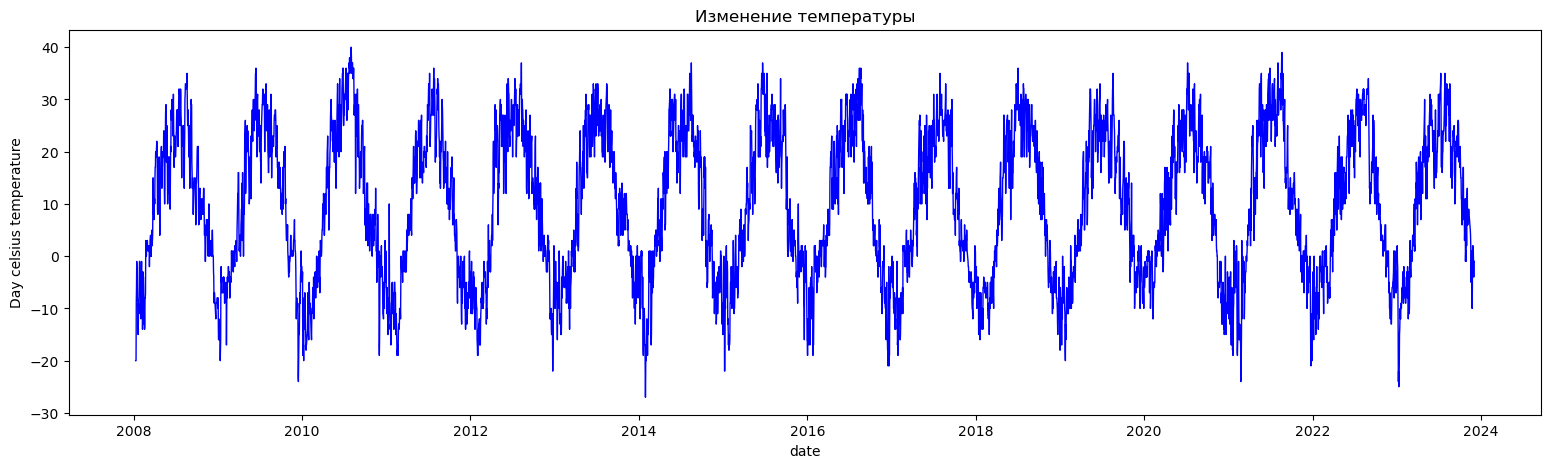

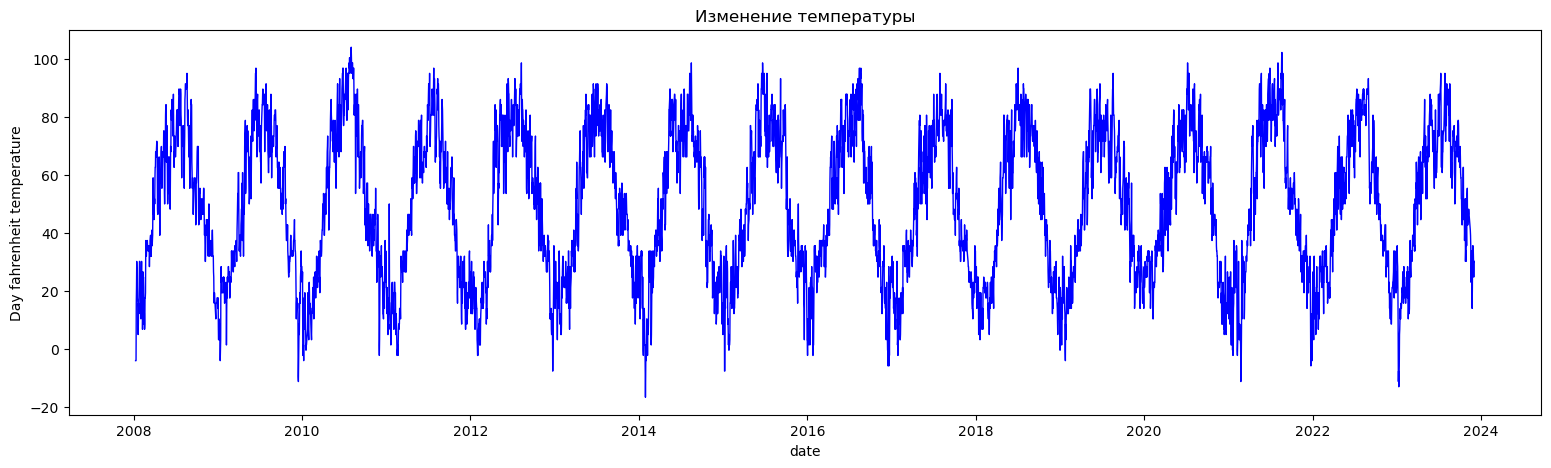

In [20]:
show_temp_graph(df, "Day celsius temperature")
show_temp_graph(df, "Day fahrenheit temperature")

Graph with median and average 

In [15]:
def show_temp_graph_median_average(df: pd.DataFrame, param: str, month: int, year: int) -> None:
    """Showing the temperature graph for the specified month in
    the year and displaying the median and average values
    Args:
      df: Dataframe with original values
      month: The month for which the temperature graph is drawn
      year: The year for which the temperature graph is drawn
    """
    month_df = df[(df.Date.dt.month == month) & (df.Date.dt.year == year)]
    fig = plt.figure(figsize=(18, 8))

    fig.add_subplot(1, 3, 1)
    plt.ylabel(f"{param} Celsius temperature")
    plt.xlabel("date")
    plt.plot(month_df.Date.dt.day, month_df[f"{param} celsius temperature"],
             color='blue', linestyle='--', linewidth=2, label='Celsius temperature')
    plt.axhline(y=month_df[f"{param} celsius temperature"].mean(
    ), color='orange', label="Average value")
    plt.axhline(y=month_df[f"{param} celsius temperature"].median(
    ), color='black', label="Median")
    plt.legend(loc=2, prop={'size': 8})

    fig.add_subplot(1, 3, 2)
    plt.ylabel(f"{param} Fahrenheit temperature")
    plt.xlabel("date")
    plt.plot(month_df.Date.dt.day, month_df[f"{param} fahrenheit temperature"],
             color='red', linestyle='--', linewidth=2, label='Fahrenheit temperature')
    plt.axhline(y=month_df[f"{param} fahrenheit temperature"].mean(
    ), color='orange', label="Average value")
    plt.axhline(y=month_df[f"{param} fahrenheit temperature"].median(
    ), color='black', label="Median")
    plt.legend(loc=2, prop={'size': 8})

    plt.show()


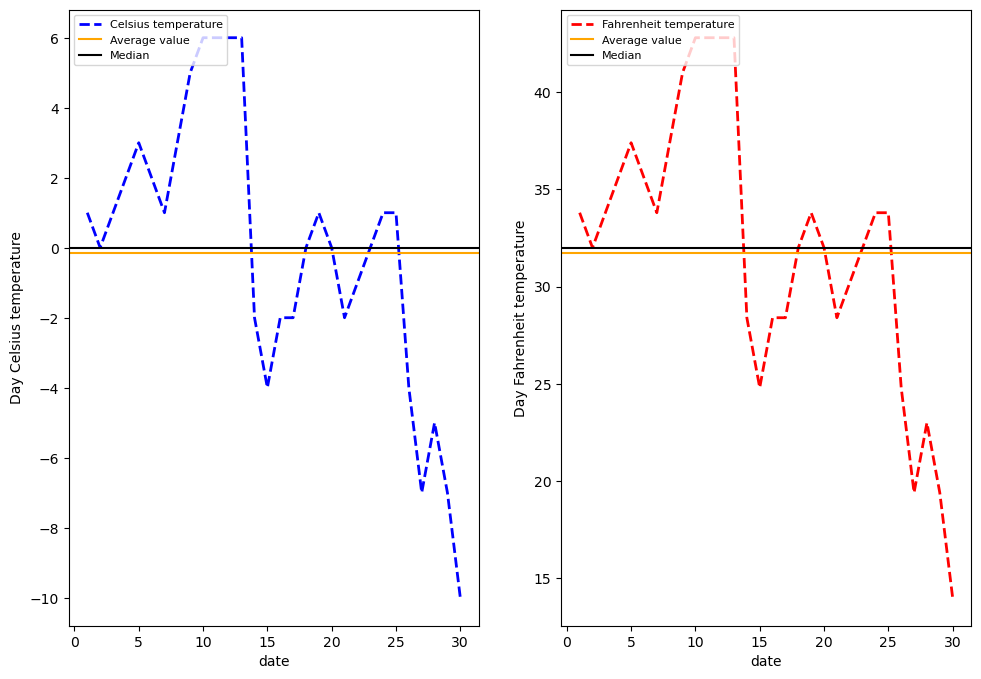

In [16]:
show_temp_graph_median_average(df, "Day", 11, 2022)